# Détection d'object
Ce tuto a pour but de vous faire compter le nombre d'objet présent dans une image. Les images sont extraites de 
http://www.cellimagelibrary.org. L'image en couleur bleu et rouge suivante est une image de cellule souche "stem cell" en anglais. Notre objectif est de compter son nombre de couleur.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

(512, 512, 3)


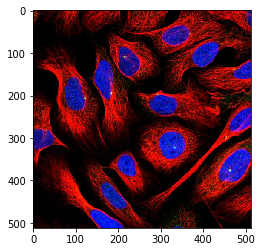

In [2]:
im =  cv2.cvtColor(cv2.imread('../image/stemCell.jpg'),cv2.COLOR_BGR2RGB)
print(im.shape)
plt.imshow(im)
plt.show()

# Afficher les channels
Comme vous l'avez fait dans le tuto `colorDetection` vous pouvez afficher les trois channels. Ici les channels sont donc dans l'ordre rouge, vert, bleu. <br \>
Faites donc un subplot avec 3 `imshow()` et tester avec et sans l'option `cmap="gray"`. Réglez la taille des images avec `plt.figure()` avec les subplots et l'option à mettre à l'intérieur `figsize` (cf la documentation de matplotlib si vous avez oubliez)

# Afficher les histogrammes
Normalement vous devriez voir les différentes parties des cellules bien séparées. Ceci est assez logique, cette image a été produite en introduisant des colorants fluorescents dans les cellules, ainsi nous pouvons bien distinguer leurs différentes parties. 
Vous pouvez afficher les différents histogrammes juste pour voir comment l'information est répartie.

La commande `.ravel()` permet d'applatir une image, c'est-à-dire passer de 2D en 1D ou d'un tableau à une ligne. 

La commande `plt.hist()` vous permet de faire l'histogramme de voir image applatie. Le second argument de `hist()` sera le nombre de baton dans l'histogramme. En général on prend ce nombre de baton égale au codage de l'image. Si un pixel d'un channel est codé sur 8 bits, on a 2^8 possibilités pour cette couleurs. (`.dtype` pour connaitre le type d'un object numpy)


# Classifier les pixels
Comme notre objectif est de compter le nombre de cellule, nous devons d'abord détecter nos cellules. Le channel bleu semble parfait pour cette taĉhe. L'histogramme nous montre bien que la plupart des pixels sont noirs, donc le fond de l'image. Les pixels blanc sont plus éparpillés, vous pouvez sélectionner les cellules en seuillant l'image, je vous laisse choisir le seuil (entre 50 et 100 c'est correct).

# Trouver les différents objets
Après le seuil, vous savez donc si un pixel fait parti d'une cellule ou non (True ou False). Maintenant il faut trouver les régions de pixels qui sont une cellule. Pour cela on rassemble les pixels voisins. On peut définir deux manières d'être voisin : en 4-connexité ou en 8-connexité.

![image](../image/connectivity.png )

On peut donc trouver les régions grâce à la commande `connectedComponents()`
https://docs.opencv.org/3.4.4/d3/dc0/group__imgproc__shape.html#gac2718a64ade63475425558aa669a943a

    retval, labels = cv.connectedComponents( image, None, 8 )

Si votre image après seuillage est de type bool (`im.dtype` pour vérifier), vous devrez la retransformer en `uint8` (unsigned int 8: int non signé sur 8 bits donc 0->255)

La valeur `retval` retourne le nombre de régions trouvées. Si vous affichez votre matrice `labels` vous voyez des régions colorées. Ici chaque pixel possède un label (un numéro d'identification) suivant son groupe.

# Identifier les cellules
Maintenant que l'on a plusieurs régions trouvées, il faut s'assurer de celle étant des cellules. Pour cela trouvons la taille de chaque régions. En regardant le code juste en dessous, trouver la taille de chaque régions et sauvegarder la dans un tableau. Vous aurez donc un tableau de la même taille que le nombre de région/label, chaque case possède la taille de sa région.

    plt.imshow(labels==5)
    print(np.sum(labels==5))

# Retirer les petites zones n'étant pas des cellules
Vous remarquez qu'il y a pleins de toutes petites régions dues au seuillage choisie. On cherche donc à retirer ces petites zones que l'on ne veut pas compter. Pour cela vous pouvez simplement virer les zones inférieures à 1000 pixels.

C'est-à-dire que dans votre tableau de taille des zones. Vous retirer les zones inférieur à `1000`.


# Afficher les cellules
Maintenant vous devez obtenir un tableau avec les labels de chaque cellule, vous pouvez donc afficher chaque cellule.